In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ipynb PRACTICE/Linear_Regression dts/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ipynb PRACTICE/Linear_Regression dts/test.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

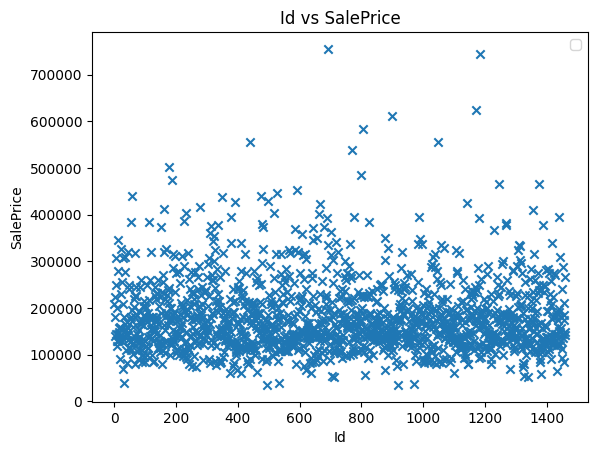

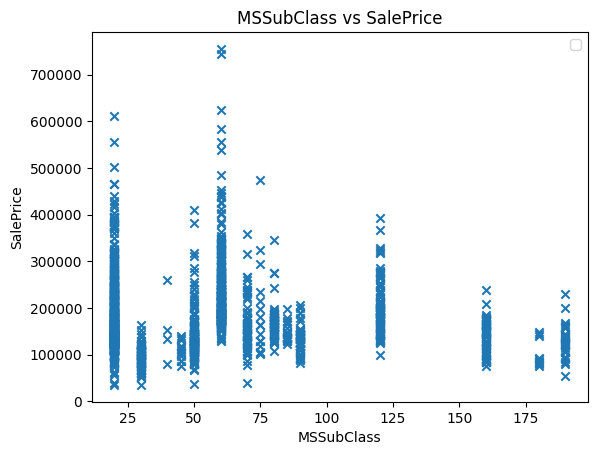

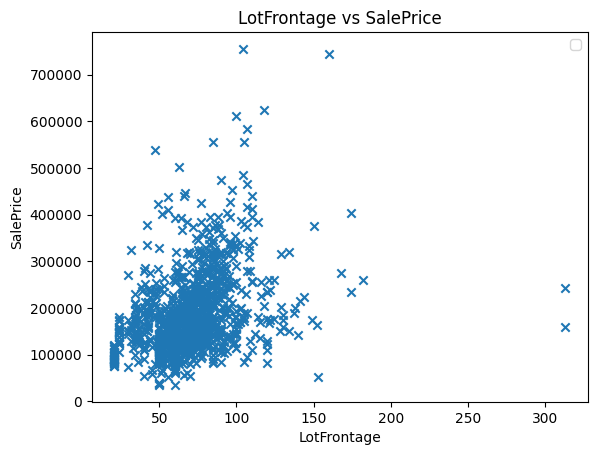

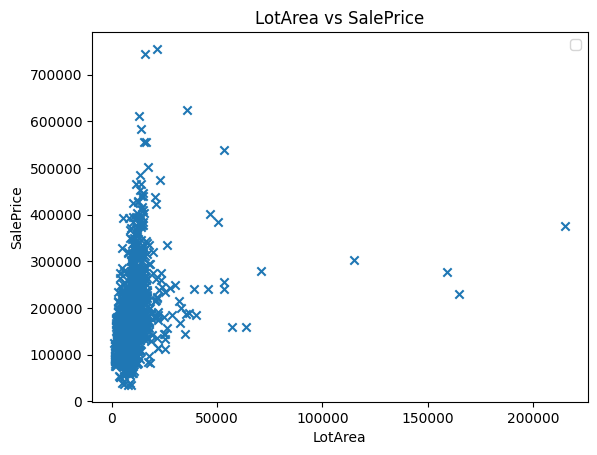

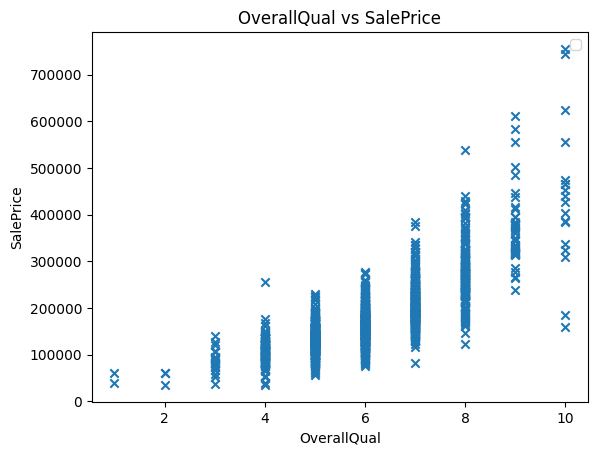

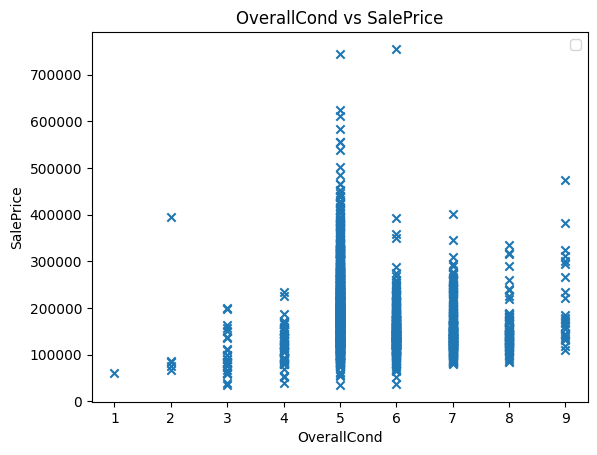

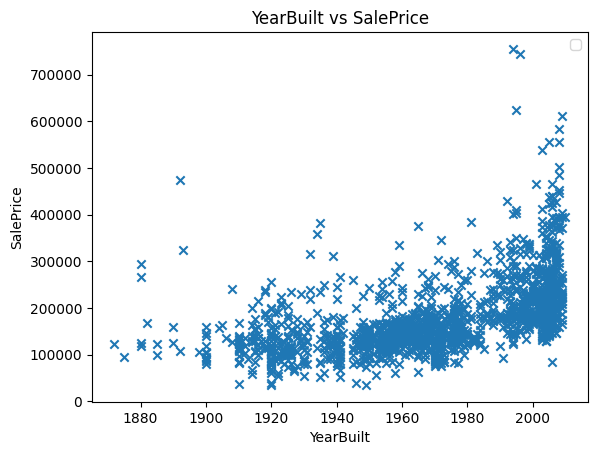

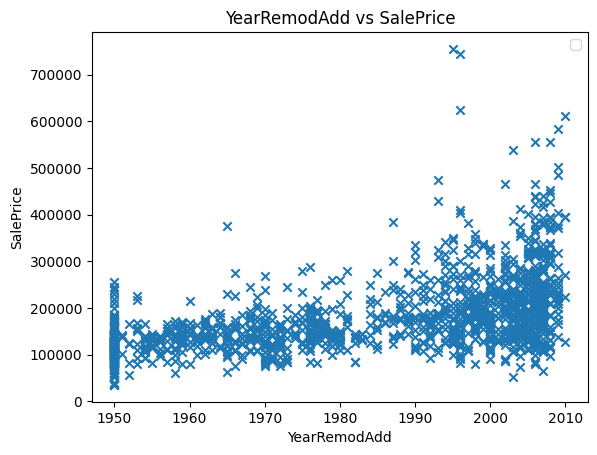

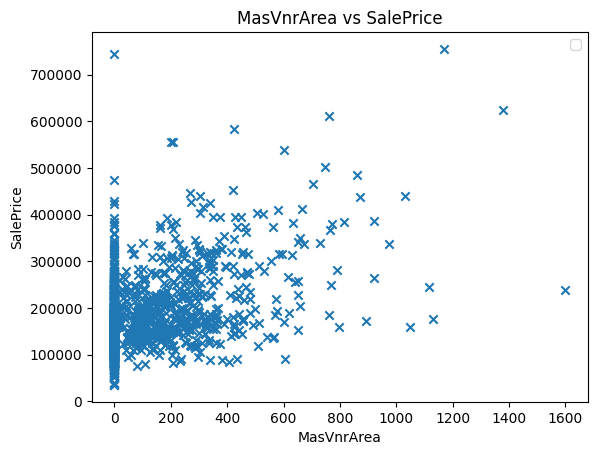

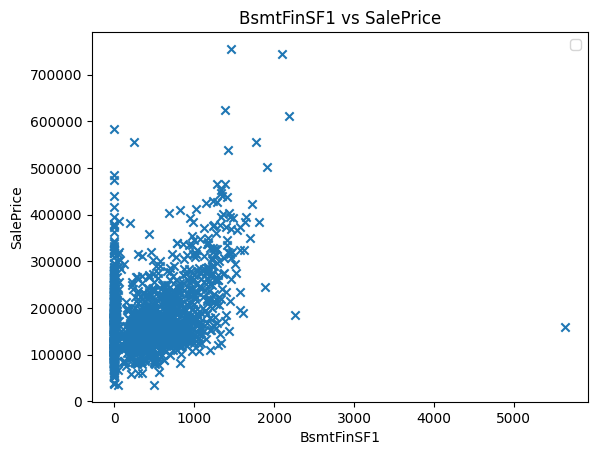

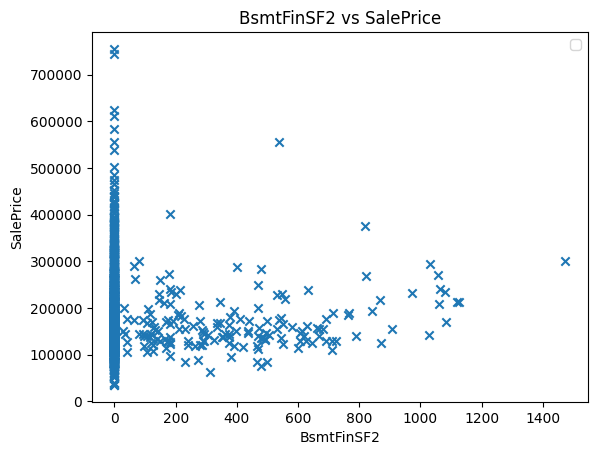

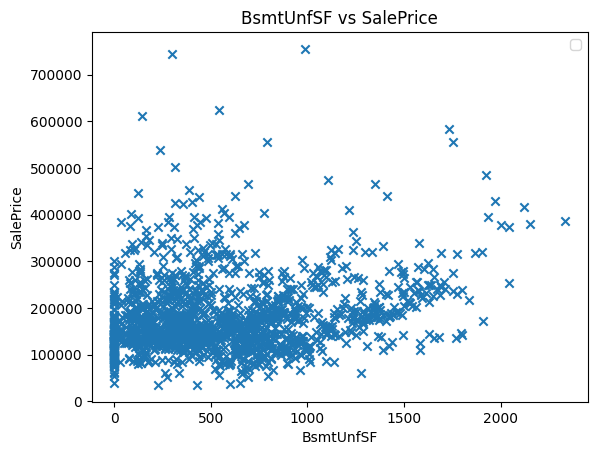

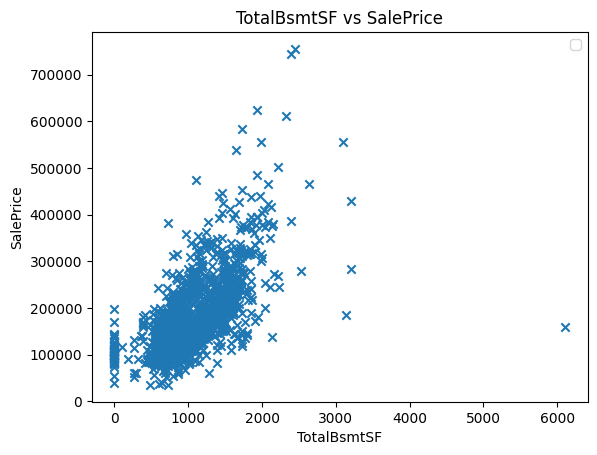

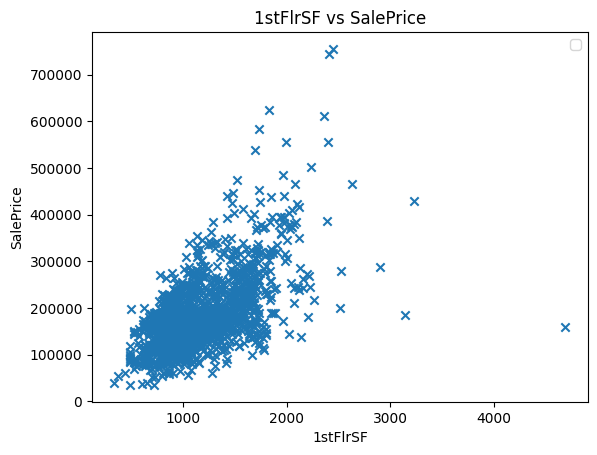

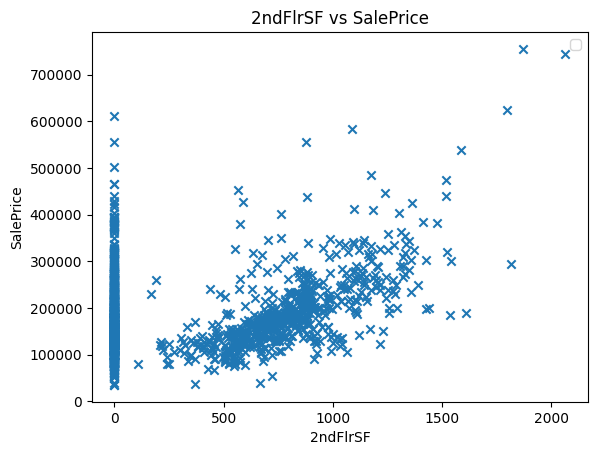

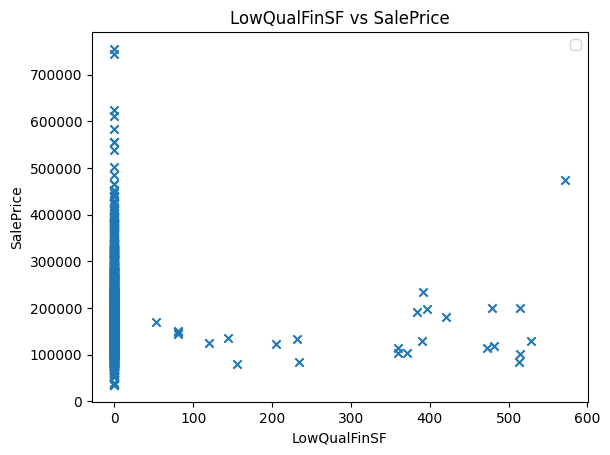

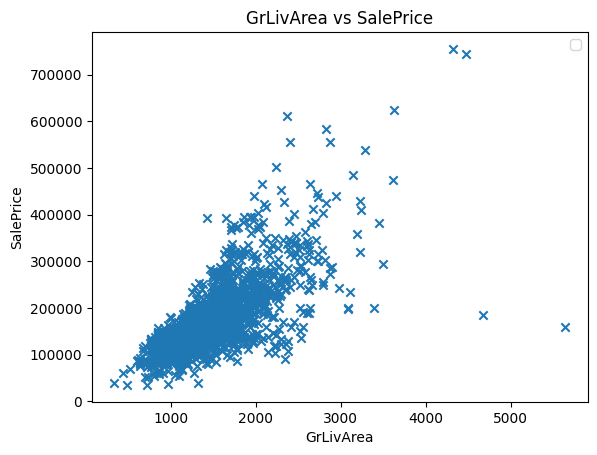

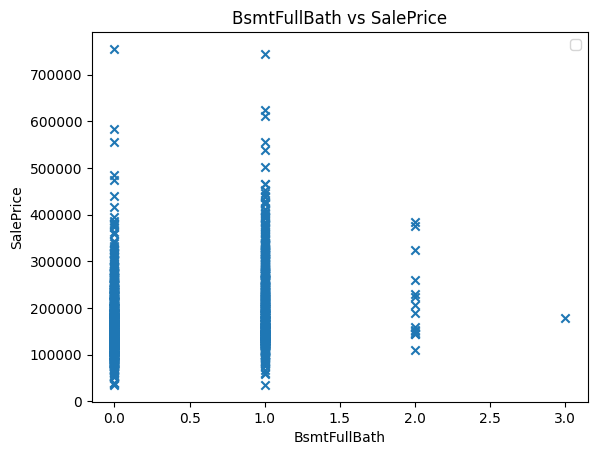

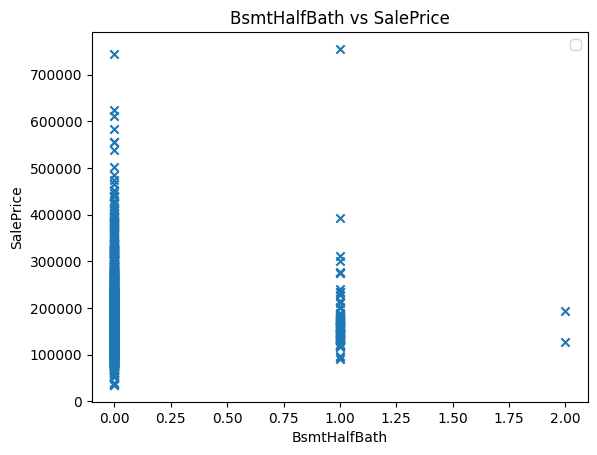

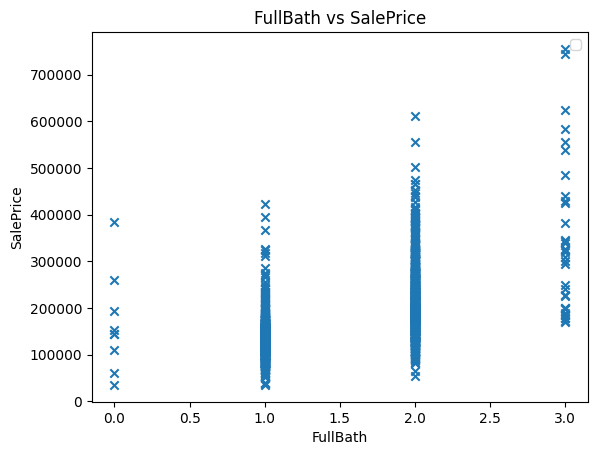

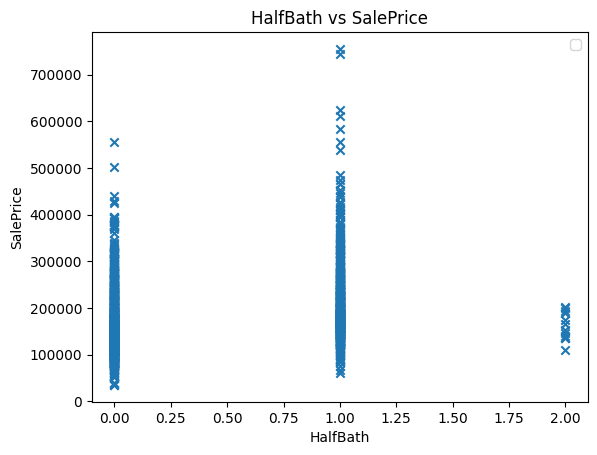

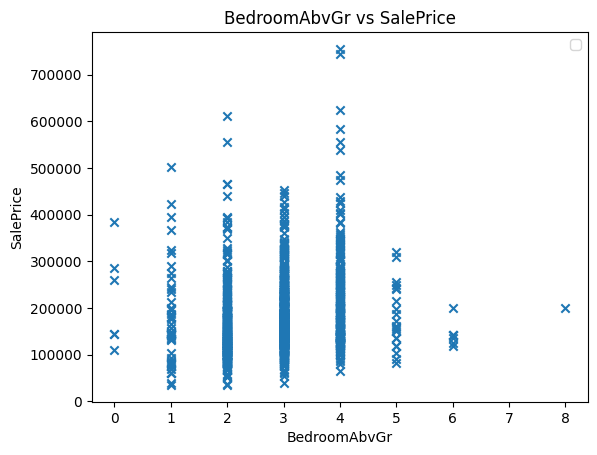

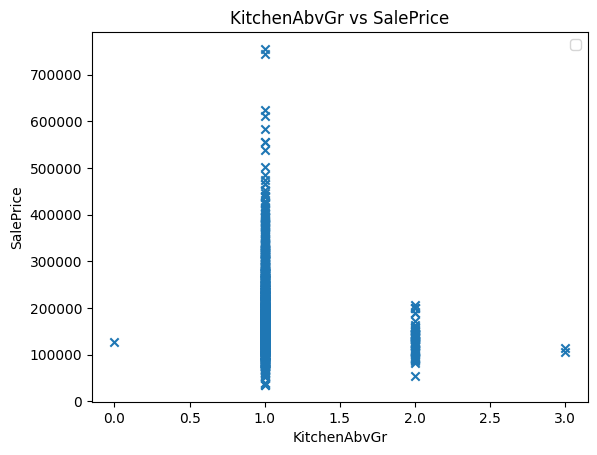

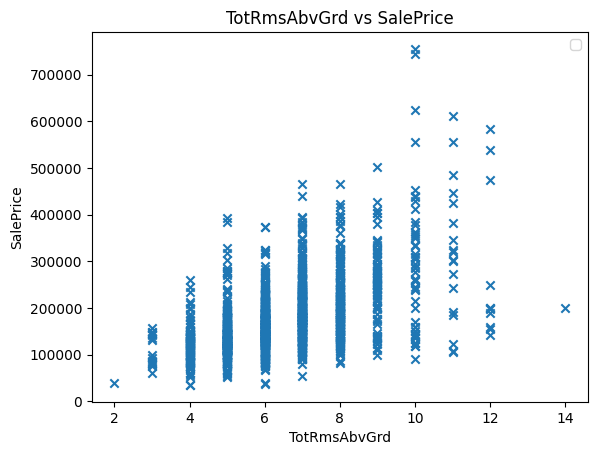

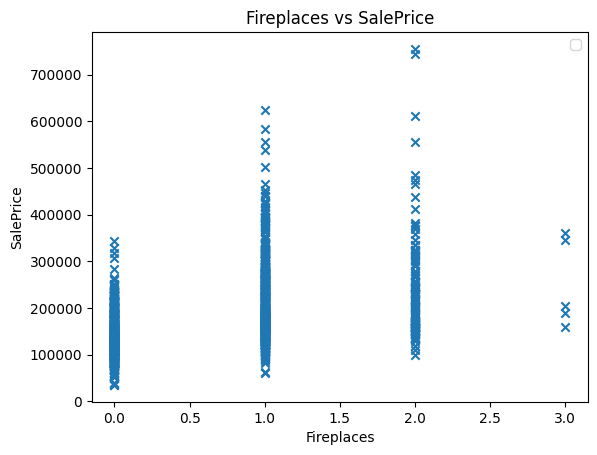

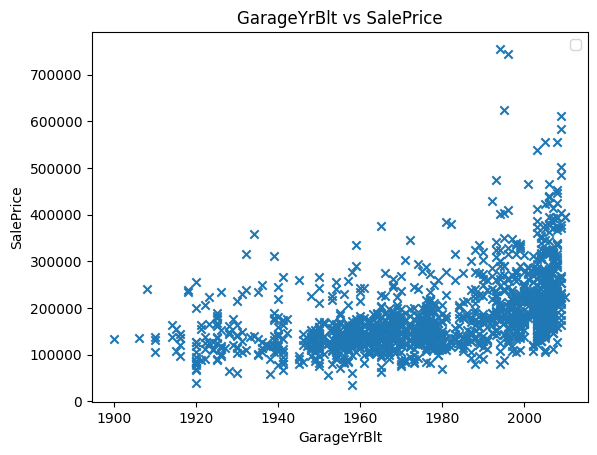

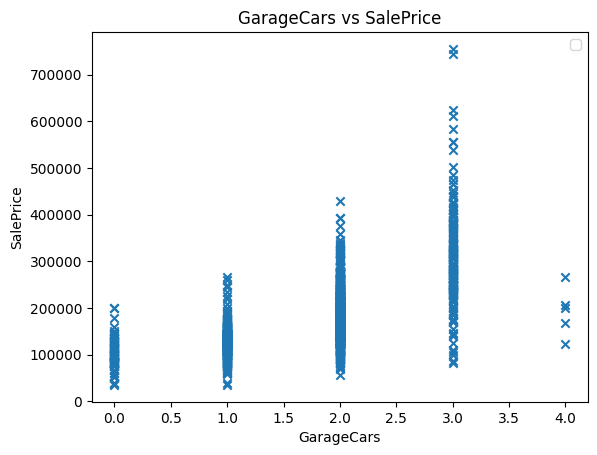

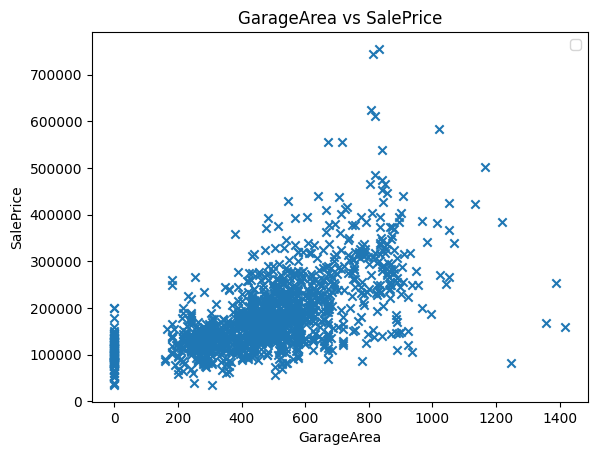

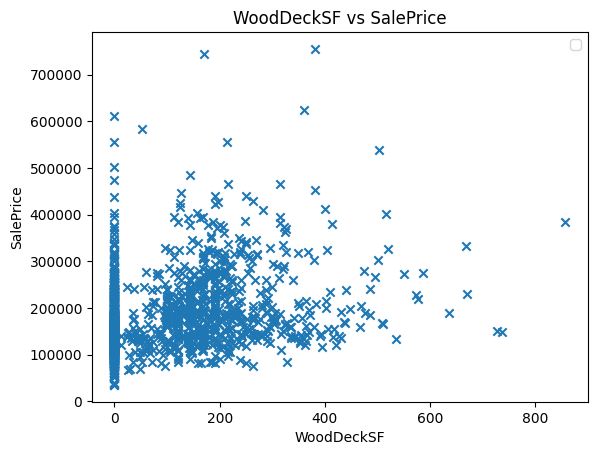

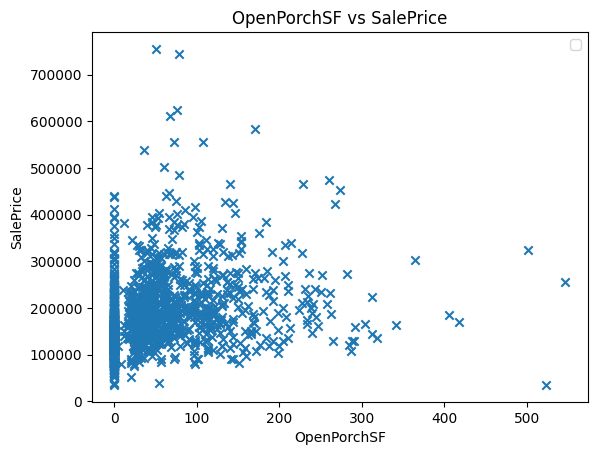

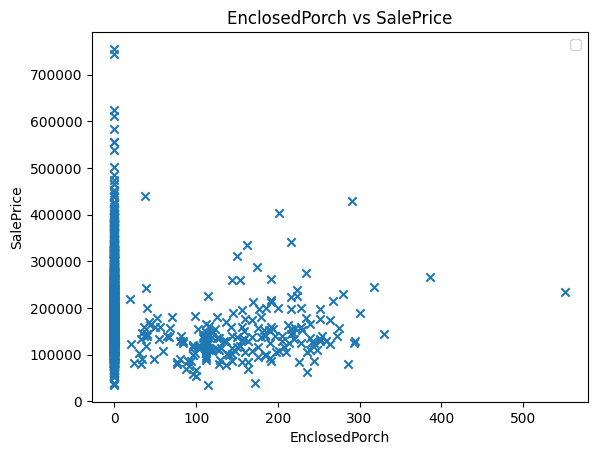

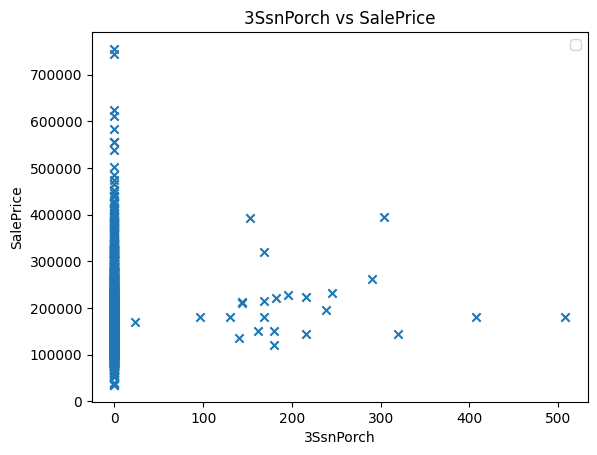

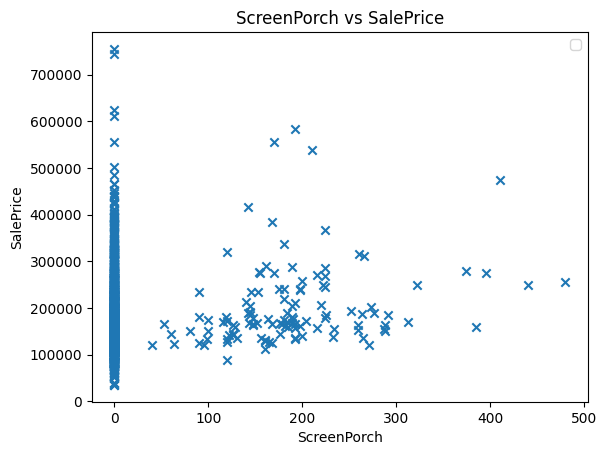

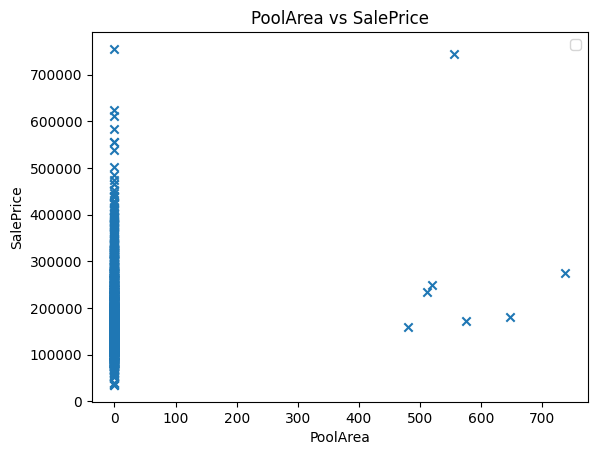

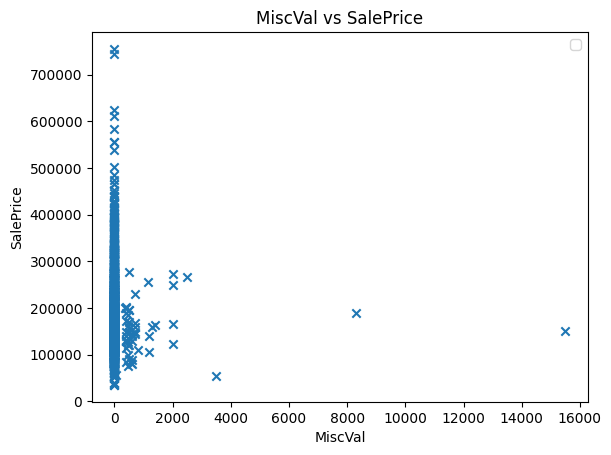

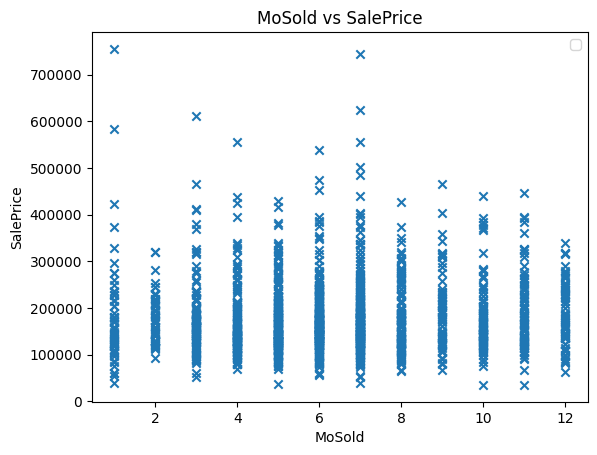

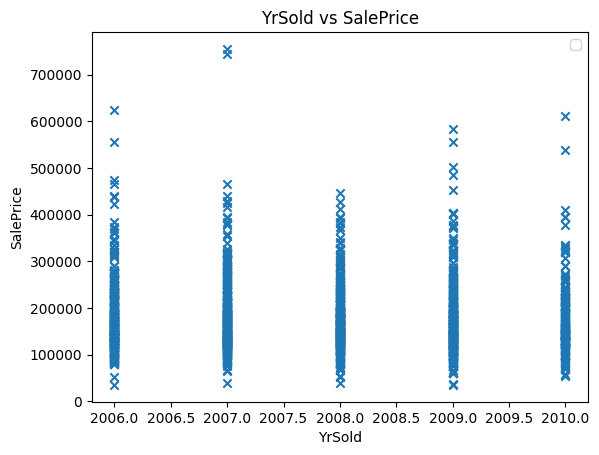

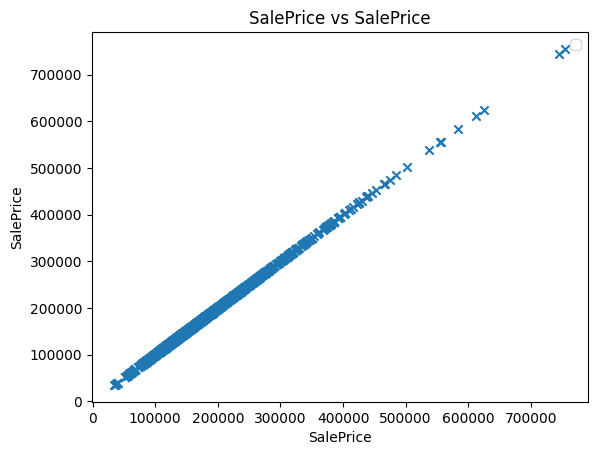

In [ ]:
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.scatter(df[column], df['SalePrice'], marker='x')
        plt.title(column + ' vs SalePrice')
        plt.ylabel('SalePrice')
        plt.xlabel(column)
        plt.legend()
        plt.show()

In [ ]:
x_train = df[['1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']]
y_train = df['SalePrice']

x_features = ['1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (1460, 4)
The shape of y_train is:  (1460,)
Number of training examples (m): 1460


#Feature scaling

In [ ]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw        X:1stFlrSF      4358
2ndFlrSF      2065
GrLivArea     5308
GarageArea    1418
dtype: int64
Peak to Peak range by column in Normalized X:[11.27685336  4.73212599 10.1046945   6.63448899]


#SGDRegressor

Gradient descent for linear model with normalized (can use Standard Scale) feature.

In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

SGDRegressor()
number of iterations completed: 11, number of weight updates: 16061.0
model parameters:                   w: [27107.34400321 11978.99636897 23457.93510599 26019.91229923], b:[180891.66951657]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [ ]:
y_pred_sgd = sgdr.predict(x_norm)
y_pred = np.dot(x_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[191121.85803511 165437.85738965 206638.79240778 207552.99404309]
Target values 
0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64


Text(0.5, 0.98, 'target versus prediction using z-score normalized model')

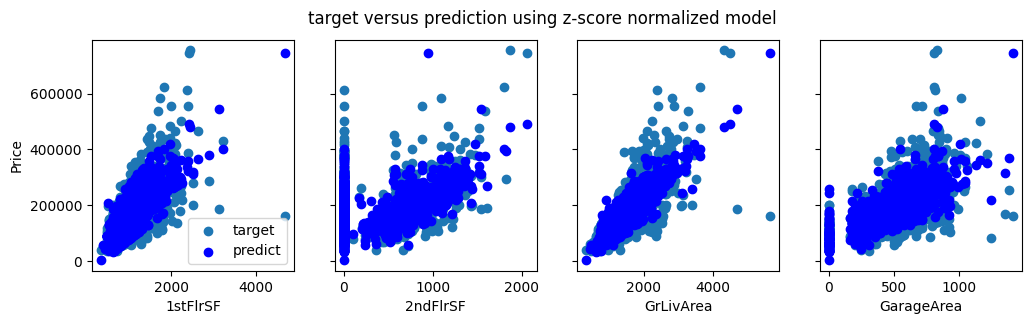

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True) #number of features
for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:,i], y_train, label = 'target')
    ax[i].set_xlabel(x_train.columns[i])
    ax[i].scatter(x_train.iloc[:,i],y_pred, color='b', label = 'predict')

ax[0].set_ylabel("Price");
ax[0].legend();

fig.suptitle("target versus prediction using z-score normalized model")